# Exam Project: The formation of ISIS' Social Media Network

Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid

# Descriptive Analysis

In [1]:
import os
import requests
import re

import networkx as nx

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # makes the bar charts red on grey background with grid, I think it is nice

from collections import Counter

from our_functions import *

import datetime

In [23]:
# This is to use the same red in all our graphs (with only one color), can obviously adjusted if you prefer other colors!
print( plt.rcParams['axes.prop_cycle'].by_key()['color'])
default_red = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]


['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']


'#E24A33'

In [2]:
df = read_tweets('tweets_1.csv')

re_tweets, actual_tweets = actual_retweets(df)

in_set, not_in_set = mentions(actual_tweets)

Unique tweets: 17410
All tweets: 17410


[Text(0, 0, 'Actual Tweets'), Text(0, 0, 'Retweets')]

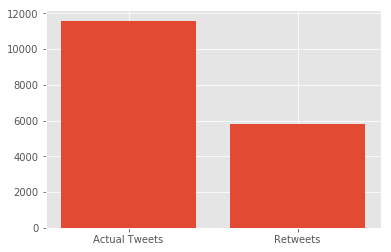

In [6]:
# How many of the tweets are actually re-tweets?
print("Unique tweets: {}".format(len(df['tweets'].unique())))
print("All tweets: {}".format(len(df['tweets'])))


plt.bar([1,2], [len(actual_tweets), len(re_tweets)], align='center')
ax = plt.gca()
ax.set_xticks([1,2])
ax.set_xticklabels(['Actual Tweets', 'Retweets'])

Text(0.5, 1.0, 'Mentioned vs. Total in tweets.csv')

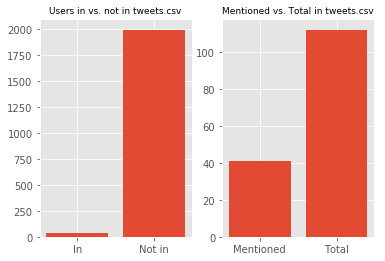

In [7]:
# How many users have been mentioned by other users?
fig, ax = plt.subplots(1,2)

ax[0].bar([1,2], [len(np.unique(in_set[:,1])), len(np.unique(not_in_set[:,1]))], align='center')
ax[0].set_xticks([1,2])
ax[0].set_xticklabels(['In', 'Not in'])
ax[0].set_title('Users in vs. not in tweets.csv', fontsize=9)

ax[1].bar([1,2], [len(np.unique(in_set[:,1])), len(df['username'].unique())], align='center')
ax[1].set_xticks([1,2])
ax[1].set_xticklabels(['Mentioned', 'Total'])
ax[1].set_title('Mentioned vs. Total in tweets.csv', fontsize=9)


# majority of users mentioned are outside the scope of the dataset.
# ca. 40 out of 110 users are mentioned within the dataset.
# only use mentioned usernames where users are not mentioning themselves.

In [9]:
# Map the most influential/ most mentioned users
sender_count = Counter(in_set[:,0])
receiver_count = Counter(in_set[:,1])
top_5_senders = sender_count.most_common(5)
top_5_receivers = receiver_count.most_common(5)

print(top_5_senders)
print(top_5_receivers)


# And who are these top 5?
for name, _ in top_5_receivers:
    print("Username: {} - {}\n".format(name,
            df[df['username'] == name]['description'].dropna().unique()[0]))

[('MaghrabiArabi', 49), ('WarReporter1', 30), ('AsimAbuMerjem', 27), ('Uncle_SamCoco', 27), ('moustiklash', 20)]
[('RamiAlLolah', 53), ('Nidalgazaui', 34), ('MilkSheikh2', 26), ('WarReporter1', 15), ('_IshfaqAhmad', 15)]
Username: RamiAlLolah - Real-Time News, Exclusives, Intelligence & Classified Information/Reports from the ME. Forecasted many Israeli strikes in Syria/Lebanon. Graphic content.

Username: Nidalgazaui - 17yr. old Freedom Activist
/Correspondence of NGNA /Terror Expert/Middle East Expert. Daily News about Syria/Iraq/Yemen/Russia/Middle East

Username: MilkSheikh2 - Muslim, Iraqi, Banu Zubid, Qahtani, Chef, Engineer, Remaining until the best of them, fights al-Dajjal, Translate Old stuff mostly

Username: WarReporter1 - Reporting on conflicts in the MENA and Asia regions.

Username: _IshfaqAhmad - Medico at GMC Srinagar • Pro-Khilafah • Anti-Democratic • Anti-Nationalistic • Anti-Rafidah • Innocent Bystander of the Conflict in Middle East • Cricketist •



In [10]:
print(df.location.value_counts())  # Funny entries, I think :)

Read my blog                                     1475
world                                            1191
Worldwide contributions                           998
Texas, USA                                        993
اُمتِ مُسلمہ ولایت کشمیر                          709
United States                                     587
28th Street, Qamar Precint                        426
Germany                                           397
Dunya                                             366
Male'. Maldives.                                  333
S.Wazirstan|Mahsud not a Wazir                    318
Middle of Nowhere                                 303
dar al-kufr                                       285
Nowhere                                           234
Wilayah Kashmir                                   231
München, Deutschland                              193
Bandar Seri Begawan, Negara Brunei Darussalam     182
Geneva, Switzerland                               166
Ghurabā                     

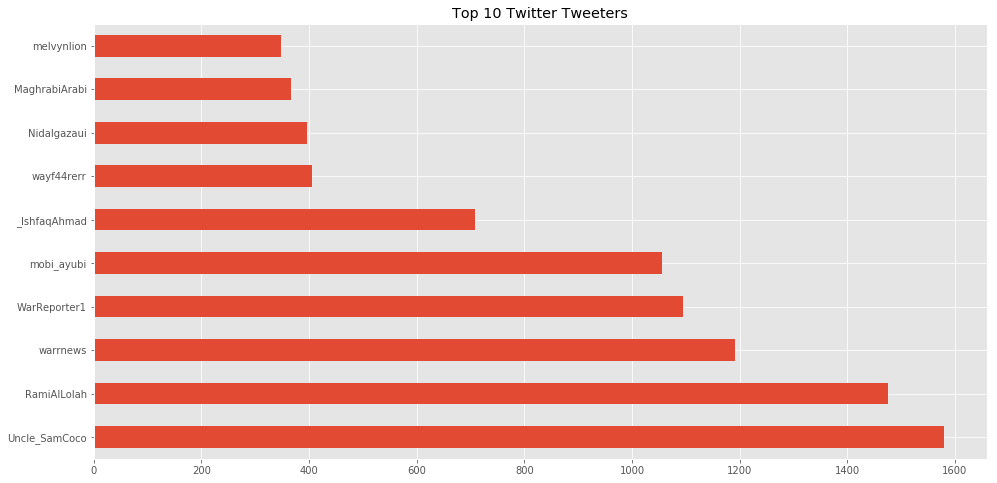

In [26]:
# Most active users
top_active = df.username.value_counts().sort_values(ascending=False)
top_active.head(10).plot.barh(title='Top 10 Twitter Tweeters', figsize=(16,8), color=default_red)

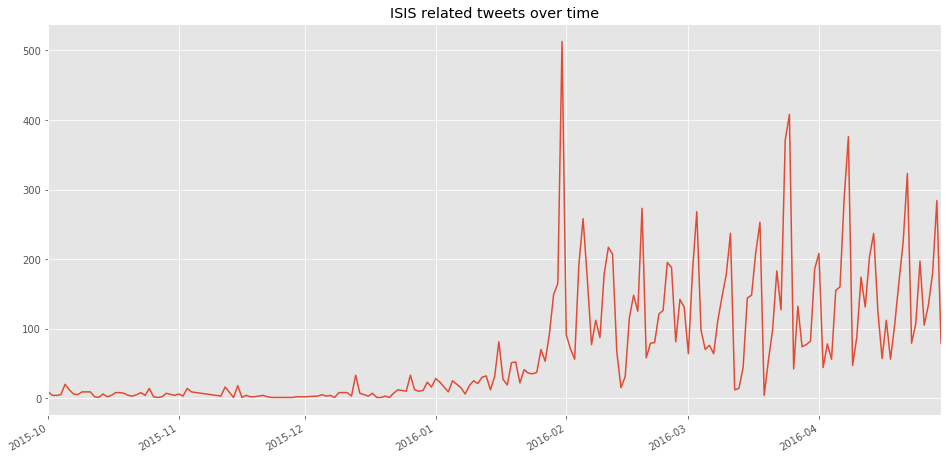

In [30]:
# Tweets over time
data.date.value_counts().plot(title='ISIS related tweets over time',
                              xlim=[datetime.date(2015, 10, 1),datetime.date(2016, 4, 30)],
                              figsize=(16,8))

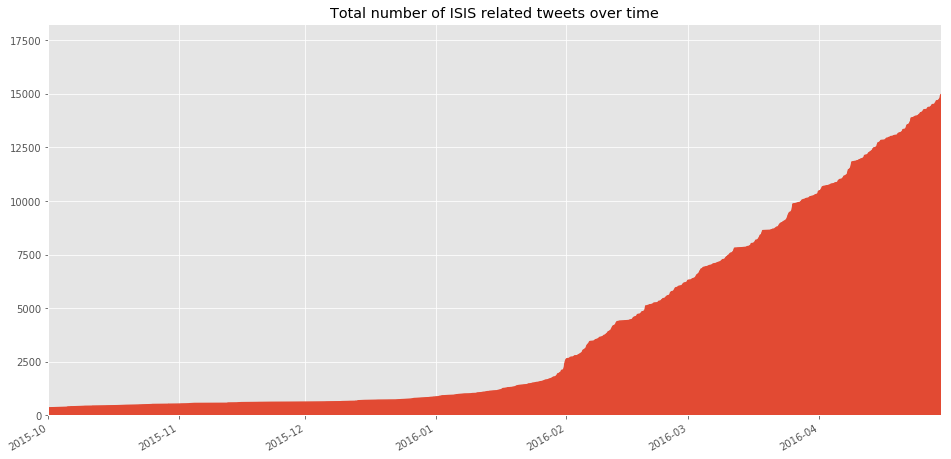

In [31]:
# cumulative visualization
data.date.value_counts().sort_index().cumsum().plot.area(title='Total number of ISIS related tweets over time',
                                                         xlim=[datetime.date(2015, 10, 1),datetime.date(2016, 4, 30)],
                                                         figsize=(16,8))

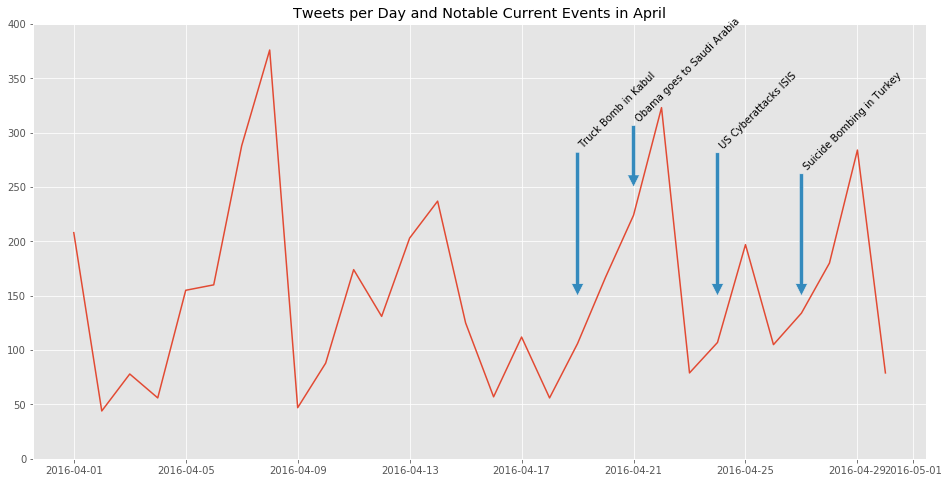

In [32]:
# Visualization using actual events:
time_tweets = data.date.value_counts().sort_index()
april_tweets = time_tweets.loc['2016-04-1':'2016-04-30']

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
line = ax.plot(april_tweets)

apr19 = 'Truck Bomb in Kabul'
ax.annotate(apr19, xytext=('2016-4-19', 350), rotation=45,
            arrowprops=dict(connectionstyle="arc3"), xy=('2016-4-19', 150))

apr21 = 'Obama goes to Saudi Arabia'
ax.annotate(apr21, xytext=('2016-4-21', 400), rotation=45,
            arrowprops=dict(connectionstyle="arc3"), xy=('2016-4-21',250))

apr24 = 'US Cyberattacks ISIS'
ax.annotate(apr24, xytext=('2016-4-24', 350), rotation=45,
            arrowprops=dict(connectionstyle="arc3"), xy=('2016-4-24', 150))

apr27 = 'Suicide Bombing in Turkey'
ax.annotate(apr27, xytext=('2016-4-27', 350), rotation=45,
            arrowprops=dict(connectionstyle="arc3"), xy=('2016-4-27', 150))

ax.set_ylim(0,400)
plt.title('Tweets per Day and Notable Current Events in April')
plt.show()

**Language detection on tweets**
Copied from [Kaggle](https://www.kaggle.com/mrisdal/most-commonly-used-natural-languages)
- [the package](https://github.com/saffsd/langid.py)
- [the codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)

The ten most used languages are: 
 en    14556
ar      742
fr      610
ms      198
id      182
la       85
sw       78
de       75
es       64
nl       57
Name: language, dtype: int64


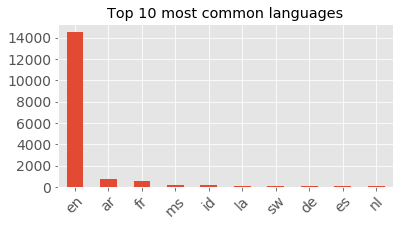

In [27]:
# df = language(df)  # TAKES SUPER LONG TO RUN

# Which are the most common languages:
print("The ten most used languages are: \n", df['language'].value_counts().head(10))

# Graph for overview
pd.Series(df['language']).value_counts().head(10).plot(kind = "bar",
                                                        figsize=(6,3),
                                                        color=default_red,
                                                        fontsize=14,
                                                        rot=45,
                                                        title = "Top 10 most common languages")